In [19]:
using Jacobi
using PyPlot
using LaTeXStrings

In [40]:
function plot_matrix(M, posneg=true,eps=1e-5)

    nrow = size(M,1)
    ncol = size(M,2)

    ntot = nrow * ncol

    A = reshape(M, ntot)

    irow = zeros(Int,ntot)
    icol = zeros(Int,ntot)

    er = maxabs(A)*eps
    
    cnt = 1
    for j = 1:ncol
        for i = 1:nrow
            irow[cnt] = i
            icol[cnt] = j
            cnt = cnt + 1
        end
    end

    if posneg
        ipos = A .> er
        ineg = A .< -er
        
        plot(icol[ipos], nrow + 1 - irow[ipos], "ro",label="positive")
        plot(icol[ineg], nrow + 1 - irow[ineg], "bo",label="negative")
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        
    else
        idx = abs(A) .> er
        plot(icol[idx], nrow + 1 - irow[idx], "o", color="black")
    end
    return
end

plot_matrix (generic function with 3 methods)

In [20]:
#resolve A*X = B
function solver_beta(A,B,nb)
  Abb = A[1:nb,1:nb]
  Abi = A[1:nb,(nb+1):end]
  Aii = A[(nb+1):end,(nb+1):end]
  Aib = A[(nb+1):end,1:nb]
  #########################
  #                       #
  #  |Abb Abi| |xb| = |Bb|#
  #  |Aib Aii| |xi|   |Bi|#
  #########################

  Bi = B[(nb+1):end]
  Bb = B[1:nb]

  Xb = inv(Abb - Abi*inv(Aii)*Aib)* (Bb - Abi*inv(Aii)*Bi)
  Xi = inv(Aii)*Bi - inv(Aii)*transpose(Abi)*Xb

  X = [Xb;Xi]
end


solver_beta (generic function with 1 method)

In [36]:
function ϕ_matrix(ψ,Q,M)
    ϕ = zeros(Q,M)
    ξ = zgj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψ(i,ξ[j],Q)
        end
    end
    return ϕ
end

ϕ_matrix (generic function with 1 method)

In [22]:
function Mass_matrix(ϕ,Q,M)
    L = zeros(M,M)
    ξ = zgj(Q)
    w = wgj(ξ,0.,0.)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]
            end
            L[i,j] = m
        end
    end
    return L
end


Mass_matrix (generic function with 1 method)

In [49]:
function Dϕ_matrix(dψ,Q,M)
    ϕ = zeros(Q,M)
    ξ = zgj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = dψ(i,ξ[j],Q)
        end
    end
    return ϕ
end


Dϕ_matrix (generic function with 1 method)

In [23]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == Q)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 * jacobi(E, p-2, 1, 1)
    end
end 

ψj (generic function with 1 method)

In [60]:
function fr(fun,ϕ,Q,M)
    ξ = zgj(Q)
    w = wgj(ξ,0.,0.)
    fr = zeros(M)
    for i in 1:M
        temp = 0.0
        for q in 1:Q
            temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
        end
        fr[i]= temp
    end
return fr
end

fr (generic function with 2 methods)

In [24]:

function ψle(p,E,Q)
   legendre(E, p-1)
end 

ψle (generic function with 1 method)

In [48]:

function dψle(p,E,Q)
    dlegendre(E, p-1)
end 

dψle (generic function with 1 method)

In [25]:
function ψla(p,E,Q)
    z = zgj(Q)
    lagrange(p,E,z)
end

ψla (generic function with 1 method)

#  Solver

In [121]:

f(x) = 4*x^2

f (generic function with 1 method)

In [144]:
ϕ  = ϕ_matrix(ψle,10,10)
Dϕ = ϕ_matrix(dψle,10,10)
DM = Mass_matrix(Dϕ,10,10)
M  = Mass_matrix(ϕ,10,10)
fn = fr(f,ϕ,10,10)
Mn =-DM + M

10x10 Array{Float64,2}:
  2.0          -5.55112e-17   5.96745e-16  …    3.60822e-16    0.0        
 -5.55112e-17  -1.33333      -1.38778e-17      -2.22045e-16   -2.0        
  5.96745e-16  -1.38778e-17  -5.6              -6.0            1.73472e-18
  0.0          -2.0          -6.93889e-18       0.0          -12.0        
  4.996e-16     0.0          -6.0             -20.0           -1.77549e-15
  0.0          -2.0           0.0          …    1.73472e-18  -30.0        
  3.747e-16     2.22045e-16  -6.0             -42.0            8.67362e-19
  0.0          -2.0          -4.44089e-16      -2.60209e-18  -56.0        
  3.60822e-16  -2.22045e-16  -6.0             -71.8824         1.04083e-17
  0.0          -2.0           1.73472e-18       1.04083e-17  -89.8947     

In [148]:
#plot_matrix(DM)
DM^-1

LoadError: LoadError: Base.LinAlg.SingularException(1)
while loading In[148], in expression starting on line 2

In [142]:

uh = solver_beta(DM,fn,0)

uq = ϕ*uh

LoadError: LoadError: Base.LinAlg.SingularException(1)
while loading In[142], in expression starting on line 2

\begin{equation}
\nabla^2 u + u = f(x)
\end{equation}


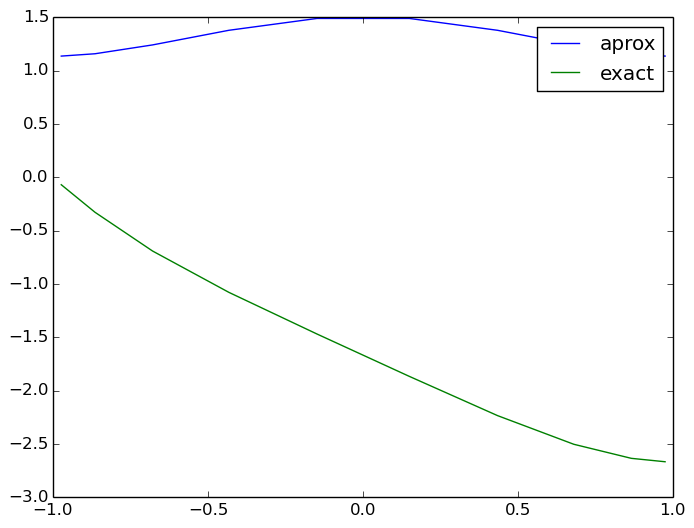

PyObject <matplotlib.legend.Legend object at 0x7fa69397e890>

In [136]:
sol(x) = (x^4 -4*x -5)/3 
ue = [sol(ξ) for ξ in zgj(10)]
ξ= zgj(10)
plot(ξ,uq,label = "aprox")
plot(ξ,ue,label = "exact")
legend()